In [1]:
require(quantreg)
gdp<-read.table("data.txt", header=TRUE)

Loading required package: quantreg

Loading required package: SparseM


Attaching package: 'SparseM'


The following object is masked from 'package:base':

    backsolve




In [2]:
str(gdp) 

'data.frame':	4135 obs. of  14 variables:
 $ r   : num  1.506 -0.101 -0.766 -0.844 0.354 ...
 $ r1  : num  0.746 1.506 -0.101 -0.766 -0.844 ...
 $ r2  : num  0.466 0.746 1.506 -0.101 -0.766 ...
 $ r3  : num  0.504 0.466 0.746 1.506 -0.101 ...
 $ v1  : num  145940 162070 192330 177000 158530 ...
 $ v2  : num  128030 145940 162070 192330 177000 ...
 $ v3  : num  133730 128030 145940 162070 192330 ...
 $ t1  : num  1 2 3 4 5 6 7 8 9 10 ...
 $ t2  : num  0.000242 0.000484 0.000726 0.000967 0.001209 ...
 $ t1sq: num  1 4 9 16 25 36 49 64 81 100 ...
 $ t2sq: num  5.85e-08 2.34e-07 5.26e-07 9.36e-07 1.46e-06 ...
 $ lnv1: num  -2.07 -2.02 -1.95 -1.98 -2.03 ...
 $ lnv2: num  -2.13 -2.07 -2.02 -1.95 -1.98 ...
 $ lnv3: num  -2.11 -2.13 -2.07 -2.02 -1.95 ...


In [3]:
head(gdp,5)

,r,r1,r2,r3,v1,v2,v3,t1,t2,t1sq,t2sq,lnv1,lnv2,lnv3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.50632,0.74612,0.46616,0.50435,145940,128030,133730,1,0.0002418380,1,5.84900e-08,-2.068777,-2.125639,-2.106722
2,-0.10131,1.50632,0.74612,0.46616,162070,145940,128030,2,0.0004836759,4,2.33940e-07,-2.023248,-2.068777,-2.125639
3,-0.76602,-0.10131,1.50632,0.74612,192330,162070,145940,3,0.0007255139,9,5.26370e-07,-1.948904,-2.023248,-2.068777
4,-0.84431,-0.76602,-0.10131,1.50632,177000,192330,162070,4,0.0009673519,16,9.35770e-07,-1.984978,-1.948904,-2.023248
5,0.35407,-0.84431,-0.76602,-0.10131,158530,177000,192330,5,0.0012091898,25,1.46214e-06,-2.032840,-1.984978,-1.948904


In [4]:
tail(gdp,5)

,r,r1,r2,r3,v1,v2,v3,t1,t2,t1sq,t2sq,lnv1,lnv2,lnv3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4131,0.53073,0.05428,-0.41754,1.17746,1389179,1453887,1646798,4131,0.9990326,17065161,0.9980662,-1.0901928,-1.070420,-1.016311
4132,-1.01318,0.53073,0.05428,-0.41754,1334199,1389179,1453887,4132,0.9992745,17073424,0.9985495,-1.1077304,-1.090193,-1.070420
4133,0.54653,-1.01318,0.53073,0.05428,1544523,1334199,1389179,4133,0.9995163,17081689,0.9990329,-1.0441566,-1.107730,-1.090193
4134,2.60349,0.54653,-1.01318,0.53073,1476679,1544523,1334199,4134,0.9997582,17089956,0.9995164,-1.0636649,-1.044157,-1.107730
4135,0.37050,2.60349,0.54653,-1.01318,1863225,1476679,1544523,4135,1.0000000,17098225,1.0000000,-0.9626857,-1.063665,-1.044157


In [5]:
taus <- seq(0.05,0.95,0.01)
para <- matrix(0,length(taus),9)
sd <- matrix(0,length(taus),9)
tsM <- matrix(0,length(taus),9)
sig <- matrix(0,length(taus),9)

In [6]:
suppressWarnings(
for (i in 1:length(taus)){
    sum <- as.matrix(coef(summary(rq(r~t2+t2sq+r1+r2+r3+lnv1+lnv2+lnv3,tau=taus[i],data=gdp))))
     para[i,] <- sum[,1]
     sd[i,] <- sum[,2]
     tsM[i,] <- sum[,3]
     sig[i,] <- sum[,4]
     #sig[i,] <- sum[,4]<=0.05
     }
    )

In [7]:
# Coefficients of indepedent variables#
round(cbind(taus,para),digits=3)

taus,,,,,,,,,
0.05,-6.690,2.934,-0.200,0.202,0.146,0.069,-0.989,-0.904,-0.740
0.06,-6.877,3.496,-0.623,0.221,0.143,0.054,-1.186,-0.672,-0.889
0.07,-6.416,3.161,-0.541,0.219,0.117,0.058,-1.125,-0.443,-1.012
0.08,-6.409,3.308,-0.642,0.206,0.110,0.057,-1.012,-0.614,-0.975
0.09,-6.363,3.492,-0.858,0.206,0.110,0.057,-1.007,-0.762,-0.826
0.10,-6.386,3.508,-0.830,0.184,0.104,0.059,-1.000,-0.683,-0.954
0.11,-6.309,3.302,-0.618,0.192,0.115,0.061,-0.975,-0.747,-0.915
0.12,-6.026,3.256,-0.682,0.181,0.114,0.040,-0.975,-0.710,-0.832
0.13,-5.834,3.137,-0.669,0.179,0.114,0.032,-1.018,-0.677,-0.760
0.14,-5.667,3.133,-0.716,0.179,0.101,0.036,-0.979,-0.638,-0.768


In [8]:
# Standard error of Coefficients of indepedent variables#
round(cbind(taus,sd),digits=3)

taus,,,,,,,,,
0.05,0.944,0.831,0.467,0.042,0.045,0.043,0.420,0.414,0.449
0.06,0.867,0.782,0.436,0.036,0.035,0.035,0.405,0.308,0.429
0.07,0.813,0.754,0.427,0.034,0.033,0.031,0.322,0.435,0.423
0.08,0.736,0.676,0.381,0.030,0.029,0.027,0.314,0.399,0.368
0.09,0.693,0.634,0.370,0.028,0.027,0.027,0.293,0.407,0.323
0.10,0.663,0.614,0.359,0.029,0.028,0.029,0.296,0.360,0.217
0.11,0.640,0.593,0.353,0.028,0.028,0.028,0.287,0.267,0.253
0.12,0.606,0.543,0.327,0.028,0.028,0.028,0.283,0.268,0.213
0.13,0.575,0.525,0.322,0.028,0.028,0.028,0.273,0.222,0.224
0.14,0.504,0.446,0.280,0.025,0.027,0.027,0.202,0.238,0.189


In [9]:
# t-student statistics of coefficient of indepedent variables#
round(cbind(taus,tsM),digits=3) 

taus,,,,,,,,,
0.05,-7.088,3.531,-0.429,4.767,3.220,1.587,-2.354,-2.185,-1.649
0.06,-7.928,4.472,-1.429,6.147,4.130,1.536,-2.928,-2.183,-2.074
0.07,-7.888,4.194,-1.265,6.388,3.586,1.834,-3.500,-1.018,-2.391
0.08,-8.705,4.892,-1.684,6.843,3.805,2.085,-3.221,-1.540,-2.649
0.09,-9.187,5.504,-2.320,7.306,4.074,2.097,-3.440,-1.873,-2.555
0.10,-9.629,5.718,-2.312,6.244,3.661,2.018,-3.383,-1.900,-4.389
0.11,-9.861,5.570,-1.748,6.769,4.066,2.214,-3.401,-2.803,-3.612
0.12,-9.943,5.995,-2.085,6.488,4.104,1.429,-3.448,-2.649,-3.901
0.13,-10.141,5.970,-2.074,6.303,4.019,1.125,-3.733,-3.049,-3.388
0.14,-11.250,7.030,-2.554,7.019,3.702,1.320,-4.840,-2.676,-4.054


In [10]:
# P-Value of t student statistics of coefficient of indepedent variables#
round(cbind(taus,sig),digits=3) 

taus,,,,,,,,,
0.05,0,0,0.668,0,0.001,0.113,0.019,0.029,0.099
0.06,0,0,0.153,0,0.000,0.125,0.003,0.029,0.038
0.07,0,0,0.206,0,0.000,0.067,0.000,0.309,0.017
0.08,0,0,0.092,0,0.000,0.037,0.001,0.124,0.008
0.09,0,0,0.020,0,0.000,0.036,0.001,0.061,0.011
0.10,0,0,0.021,0,0.000,0.044,0.001,0.057,0.000
0.11,0,0,0.081,0,0.000,0.027,0.001,0.005,0.000
0.12,0,0,0.037,0,0.000,0.153,0.001,0.008,0.000
0.13,0,0,0.038,0,0.000,0.261,0.000,0.002,0.001
0.14,0,0,0.011,0,0.000,0.187,0.000,0.007,0.000


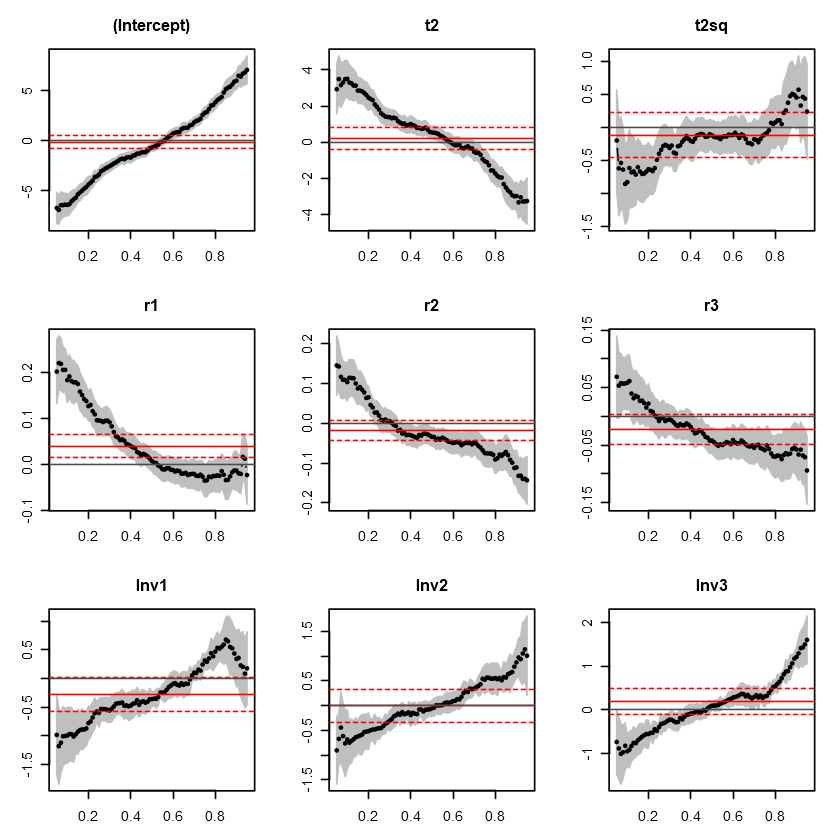

In [11]:
om1<-suppressWarnings(summary(rq(r~t2+t2sq+r1+r2+r3+lnv1+lnv2+lnv3,tau = seq(0.05, 0.95, by = 0.01),data=gdp)))
plot(om1)

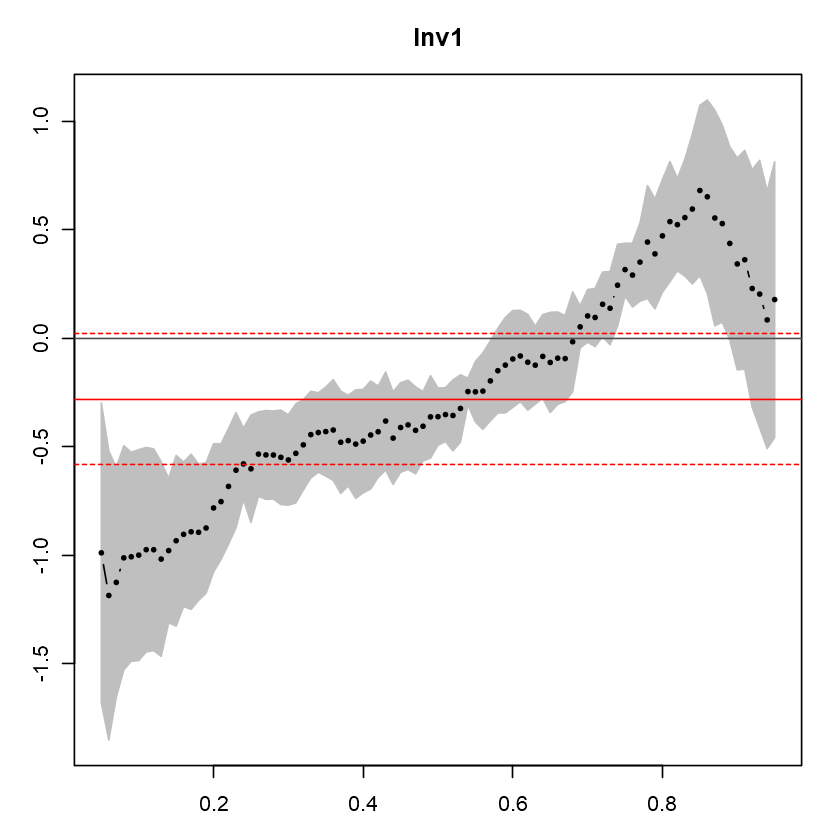

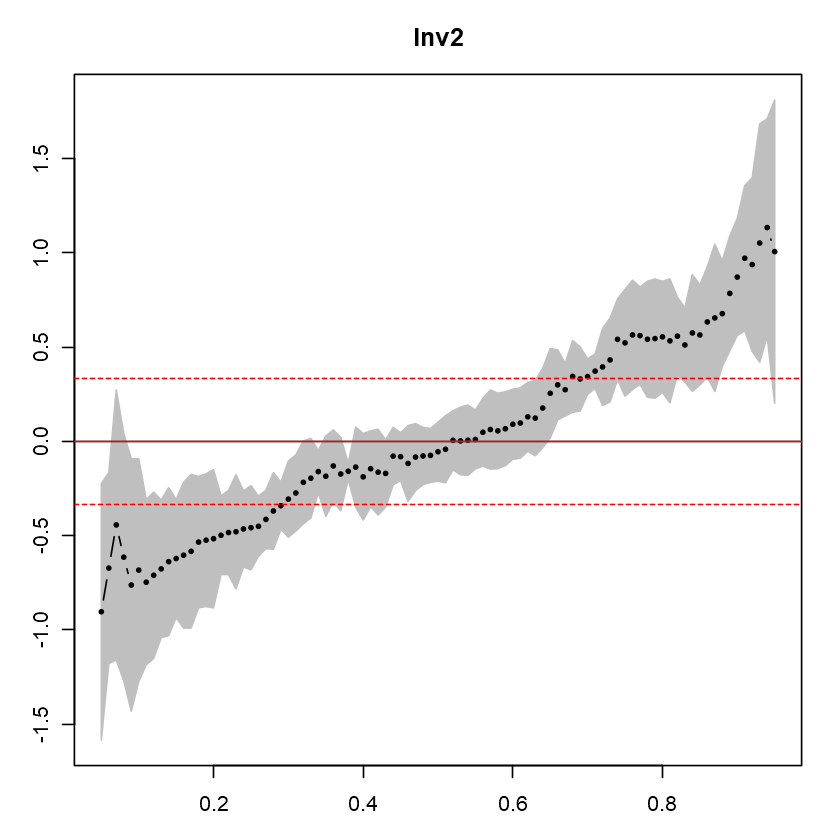

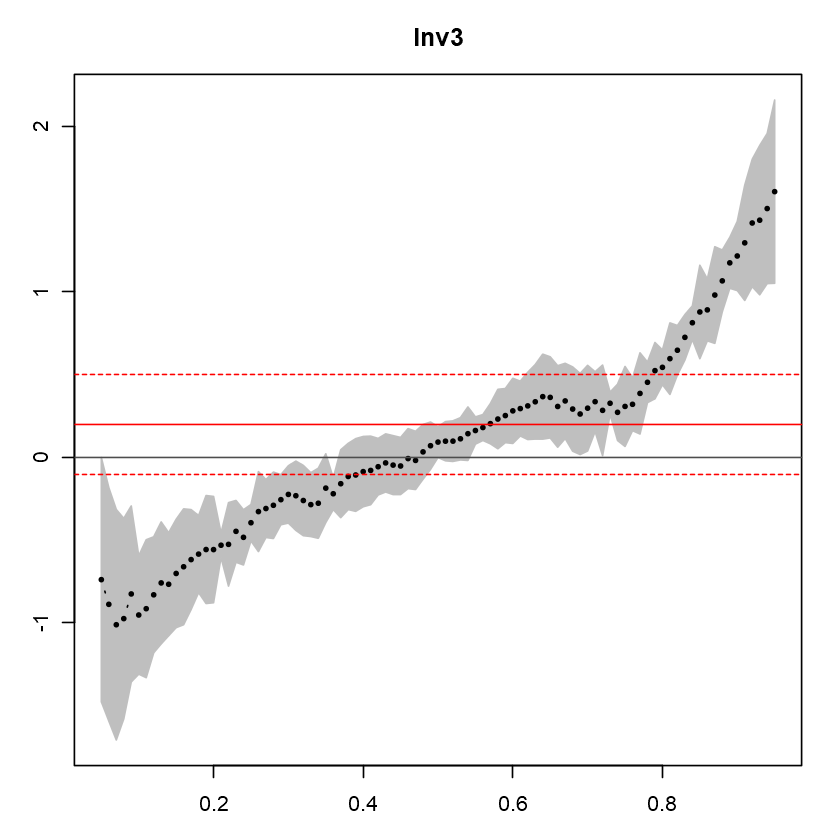

In [12]:
for (ii in 7:9){
plot(om1, parm = ii)
}